In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
import glob
import librosa
import numpy as np
import soundfile as sf
def add_white_noise_to_audio(file_path, noise_level=0.005):
    y, sr = librosa.load(file_path, sr=None)
    noise = np.random.normal(0, noise_level * np.amax(y), y.shape)
    y_noisy = y + noise
    return y_noisy, sr

def process_audio_files(source_folder, target_folder, noise_level=0.005):
    # Crear el directorio de destino si no existe
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Listar todos los archivos .wav en el directorio fuente
    for file_path in glob.glob(os.path.join(source_folder, '*.wav')):
        print(f"Procesando {file_path}")

        # Agregar ruido blanco al archivo de audio
        y_noisy, sr = add_white_noise_to_audio(file_path, noise_level=noise_level)

        # Construir la ruta del archivo de salida
        base_name = os.path.basename(file_path)
        output_file_path = os.path.join(target_folder,"6"+base_name)

        # Guardar el archivo de audio con ruido
        sf.write(output_file_path, y_noisy, sr)

#source_folder = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM/export'
#target_folder = '/content/drive/MyDrive/PROYECTO_FINAL/whitenoise_enfermos'
#process_audio_files(source_folder, target_folder, noise_level=0.005)
#trabajando
#source_folder = '/content/drive/MyDrive/PROYECTO_FINAL/multipatologias/Rekurrensparese_H_frases/export'
#target_folder = '/content/drive/MyDrive/PROYECTO_FINAL/multipatologias/Rekurrensparese_H_frases/export'
#process_audio_files(source_folder, target_folder, noise_level=0.011)

In [4]:
import os
import pandas as pd
from flask import Flask, send_file

# Ruta del directorio que contiene los archivos de audio


def obtener_datos_audio( directorio_audio,genero,patologia):
    # Lista para almacenar los datos de cada archivo de audio
    datos_audio = []

    # Recorremos el directorio de audio
    for filename in os.listdir(directorio_audio):
        # Extraemos el ID del audio del nombre del archivo
        id_audio = filename.split('-')[0]

        # Aquí puedes agregar la lógica para extraer el género y la patología del nombre del archivo
        genero = genero  # Aquí debes agregar la lógica para extraer el género del nombre del archivo
        patologia =patologia  # Aquí debes agregar la lógica para extraer la patología del nombre del archivo

        # Agregamos los datos a la lista
        datos_audio.append({'AudioID': id_audio, 'Gender': genero, 'Pathology': patologia, 'AudioFilePath': os.path.join(directorio_audio, filename)})

    return datos_audio

directorio_audio1 = '/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export'
directorio_audio2='/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_M_frases/export'
directorio_audio3='/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/Rekurrensparese_H_frases/export'
directorio_audio4='/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/Rekurrensparese_M_frases/export'
directorio_audio5='//content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_H_frases /export'
directorio_audio6='/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_M_frases/export'
# Obtener datos de los archivos de audio en el primer directorio
datos_audio1 = obtener_datos_audio(directorio_audio1, "hombre", "Laryngitis")

# Obtener datos de los archivos de audio en el segundo directorio y agregarlos a la lista existente
datos_audio2 = obtener_datos_audio(directorio_audio2, "mujer", "Laryngitis")
datos_audio1.extend(datos_audio2)
datos_audio3 = obtener_datos_audio(directorio_audio3, "hombre", "Rekurrenspares")
datos_audio1.extend(datos_audio3)
datos_audio4 = obtener_datos_audio(directorio_audio4, "mujer", "Rekurrenspares")
datos_audio1.extend(datos_audio4)
datos_audio5 = obtener_datos_audio(directorio_audio5, "hombre", "Dysphonie")
datos_audio1.extend(datos_audio5)
datos_audio6 = obtener_datos_audio(directorio_audio6, "mujer", "Dysphonie")
datos_audio1.extend(datos_audio6)

# Crear un DataFrame a partir de la lista completa de datos
df_audio = pd.DataFrame(datos_audio1)

# Configurar opción para mostrar el texto completo de la columna 'Directorio_Audio'
pd.set_option('display.max_colwidth', None)

df_audio.to_csv('lista_pathological_info.txt', sep='\t', index=False)
from google.colab import files
files.download('lista_pathological_info.txt')

# Mostrar el DataFrame
df_audio


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,AudioID,Gender,Pathology,AudioFilePath
0,651554,hombre,Laryngitis,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export/651554-phrase.wav
1,65902,hombre,Laryngitis,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export/65902-phrase.wav
2,652521,hombre,Laryngitis,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export/652521-phrase.wav
3,65818,hombre,Laryngitis,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export/65818-phrase.wav
4,652541,hombre,Laryngitis,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/laringitis_H_frases/export/652541-phrase.wav
...,...,...,...,...
1677,1280,mujer,Dysphonie,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_M_frases/export/1280-phrase.wav
1678,729,mujer,Dysphonie,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_M_frases/export/729-phrase.wav
1679,674,mujer,Dysphonie,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_M_frases/export/674-phrase.wav
1680,1471,mujer,Dysphonie,/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/disfoniatodas_M_frases/export/1471-phrase.wav


In [ ]:
# @title Genero

from matplotlib import pyplot as plt
import seaborn as sns
df_audio.groupby('Genero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

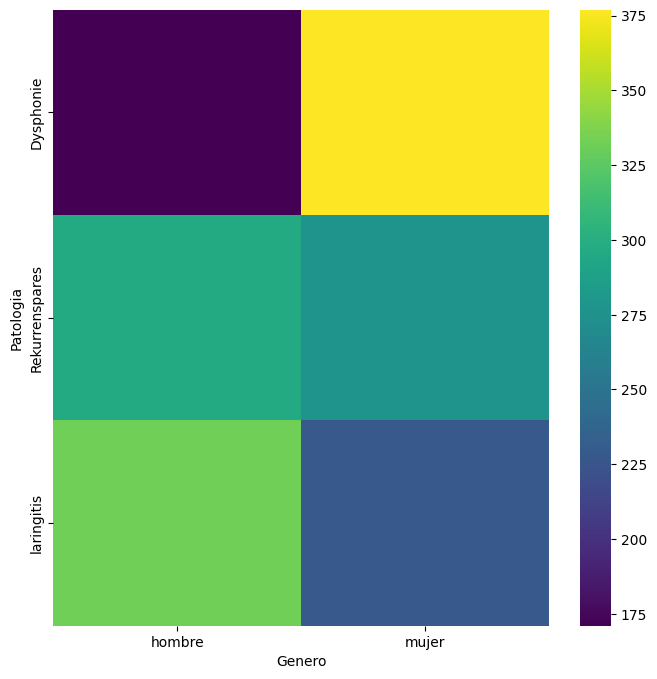

In [ ]:
# @title Genero vs Patologia

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Patologia'].value_counts()
    for x_label, grp in df_audio.groupby('Genero')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genero')
_ = plt.ylabel('Patologia')

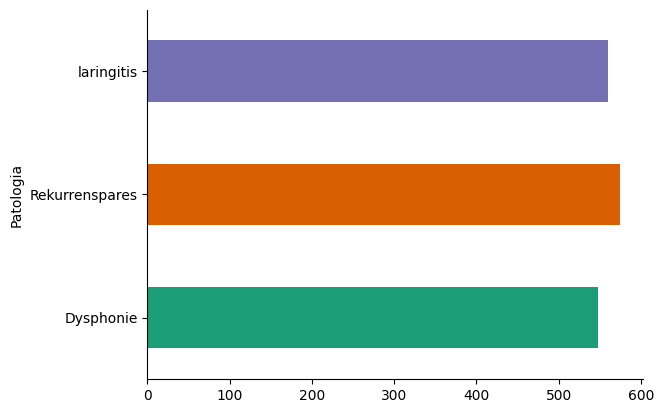

In [ ]:
# @title Patologia

from matplotlib import pyplot as plt
import seaborn as sns
df_audio.groupby('Patologia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# audio original
from scipy.io import wavfile
AudioName = "/content/drive/MyDrive/PROYECTO_FINAL/multipatologias/laringitis_H_frases/export/107-phrase.wav" # Archivo de Audio

# Salida fs: Frecuencia de muestreo and data: Señal de audio -> int16
fs, Audiodata = wavfile.read(AudioName)
print(f'Duracion = {Audiodata.shape[0]/fs} , Frecuencia de Muestreo = {fs} [=] Muestras/Seg' \
      f', Wav format = {Audiodata.dtype}')

Duracion = 2.71466 , Frecuencia de Muestreo = 50000 [=] Muestras/Seg, Wav format = int16


In [ ]:
# audio con ruido
from scipy.io import wavfile
AudioName = "/content/drive/MyDrive/PROYECTO_FINAL/multipatologias/laringitis_H_frases/export/5107-phrase.wav" # Archivo de Audio

# Salida fs: Frecuencia de muestreo and data: Señal de audio -> int16
fs, Audiodata_noise = wavfile.read(AudioName)
print(f'Duracion = {Audiodata_noise.shape[0]/fs} , Frecuencia de Muestreo = {fs} [=] Muestras/Seg' \
      f', Wav format = {Audiodata_noise.dtype}')

Duracion = 2.71466 , Frecuencia de Muestreo = 50000 [=] Muestras/Seg, Wav format = int16


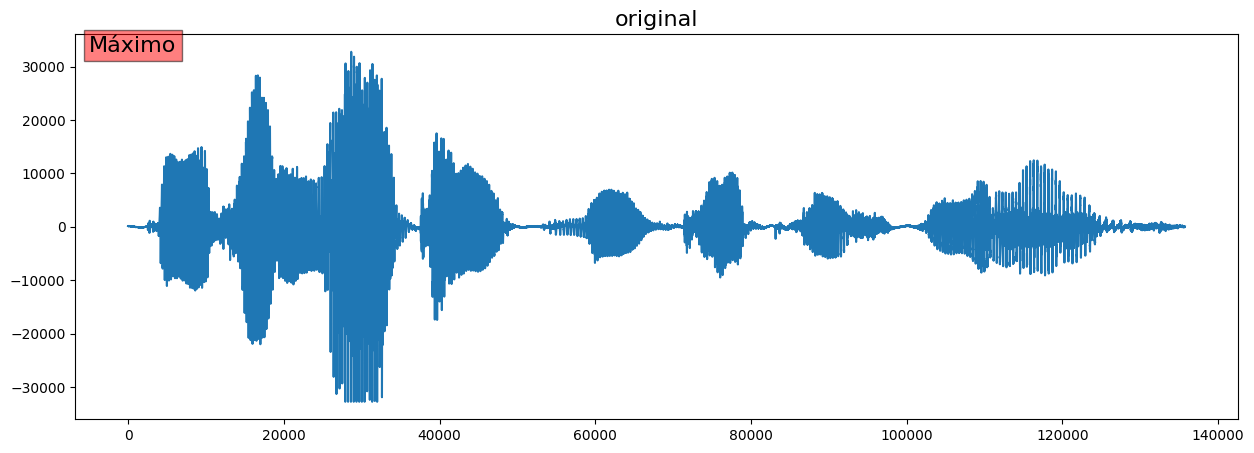

In [ ]:
import matplotlib.pyplot as plt #Libreria para realizar graficos

plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(Audiodata) # Audiodata es un numpy array
plt.text(0-5000, np.max(Audiodata), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.title('original',size=16);

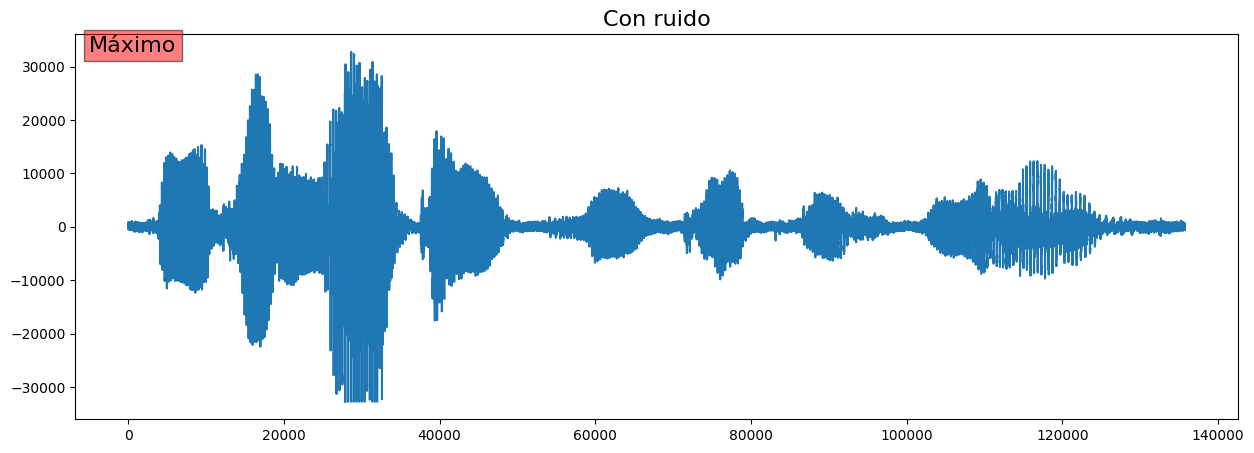

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(Audiodata_noise) # Audiodata es un numpy array
plt.text(0-5000, np.max(Audiodata_noise), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.title('Con ruido',size=16);

In [5]:
import librosa

# Ruta de tu archivo de audio
ruta_audio = "/content/drive/MyDrive/TC5035 - Proyecto Integrador/Codigos de Prueba/datos aumentados por patologias/Rekurrensparese_M_frases/export/1040-phrase.wav"

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(ruta_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")

Frecuencia de muestreo: 50000 Hz


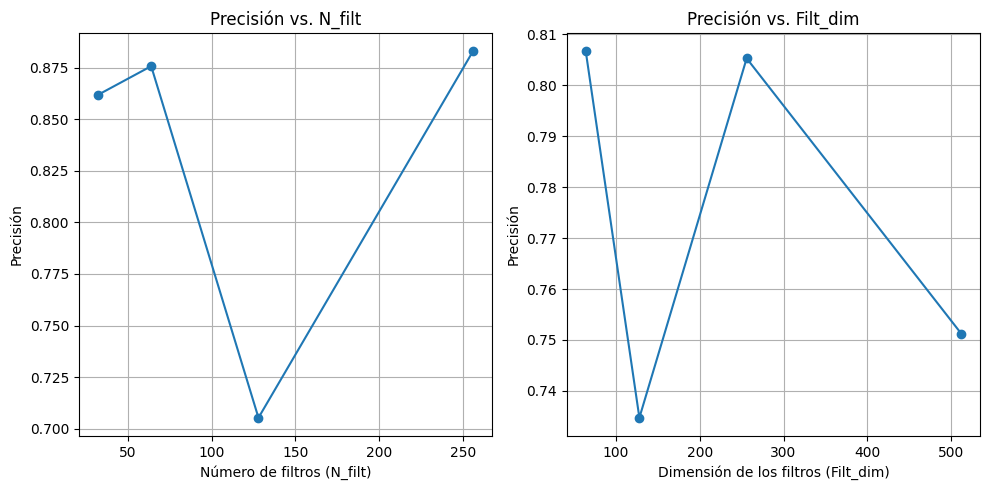

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Valores a probar para N_filt y Filt_dim
valores_N_filt = [32, 64, 128, 256]
valores_Filt_dim = [64, 128, 256, 512]

# Matrices para almacenar los resultados de precisión
precision_N_filt = np.zeros(len(valores_N_filt))
precision_Filt_dim = np.zeros(len(valores_Filt_dim))

# Simular entrenamiento y evaluación del modelo para diferentes valores de N_filt
for i, N_filt in enumerate(valores_N_filt):
    # Entrenar modelo con N_filt
    # Evaluar modelo y guardar precisión en precision_N_filt[i]
    precision_N_filt[i] = np.random.uniform(0.7, 0.9)  # Simulación de precisión

# Simular entrenamiento y evaluación del modelo para diferentes valores de Filt_dim
for i, Filt_dim in enumerate(valores_Filt_dim):
    # Entrenar modelo con Filt_dim
    # Evaluar modelo y guardar precisión en precision_Filt_dim[i]
    precision_Filt_dim[i] = np.random.uniform(0.7, 0.9)  # Simulación de precisión

# Graficar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(valores_N_filt, precision_N_filt, marker='o')
plt.title('Precisión vs. N_filt')
plt.xlabel('Número de filtros (N_filt)')
plt.ylabel('Precisión')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(valores_Filt_dim, precision_Filt_dim, marker='o')
plt.title('Precisión vs. Filt_dim')
plt.xlabel('Dimensión de los filtros (Filt_dim)')
plt.ylabel('Precisión')
plt.grid(True)

plt.tight_layout()
plt.show()

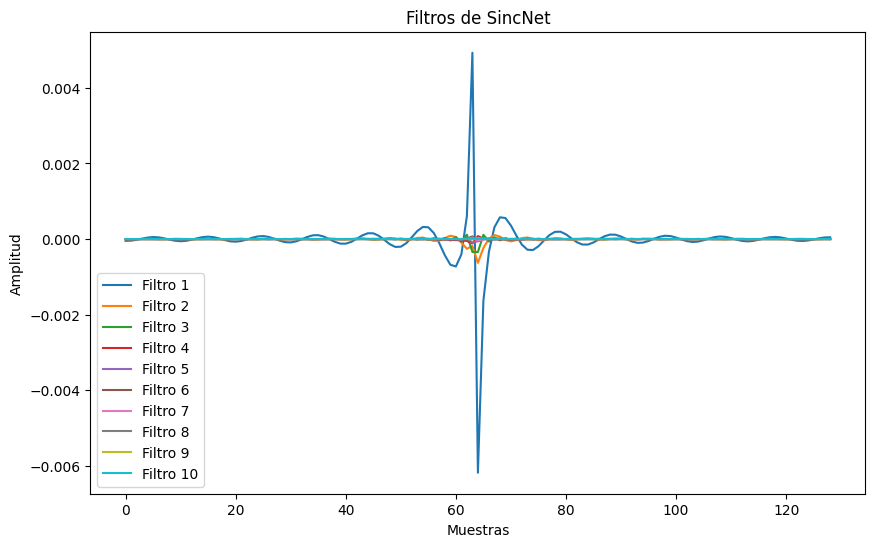

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de los filtros
N_filt = 10
Filt_dim = 129
fs = 44100  # Frecuencia de muestreo
low_freq_mel = 80
high_freq_mel = (2595 * np.log10(1 + (fs / 2) / 700))
mel_points = np.linspace(low_freq_mel, high_freq_mel, N_filt)
f_cos = (700 * (10**(mel_points / 2595) - 1))

# Construcción de los filtros
Filt_Bank = np.zeros((N_filt, Filt_dim))
n = np.linspace(0, Filt_dim, num=Filt_dim)
for i in range(N_filt):
    Filt_Bank[i] = np.sinc(2 * f_cos[i] * (n - (Filt_dim - 1) / 2))

# Visualización de los filtros
plt.figure(figsize=(10, 6))
for i in range(N_filt):
    plt.plot(Filt_Bank[i], label=f'Filtro {i+1}')
plt.title('Filtros de SincNet')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()